In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/IE313/DoAn/Data/wdi_pca_3.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Country,Country_code,PC1,PC2,PC3
0,Afghanistan,AFG,-4.440609,0.199704,-0.681927
1,Albania,ALB,1.384765,-1.001156,-0.291110
2,Algeria,DZA,1.394803,-1.304758,-0.833515
3,Andorra,AND,2.933966,1.703989,-0.540343
4,Angola,AGO,-3.776741,1.589128,1.606514


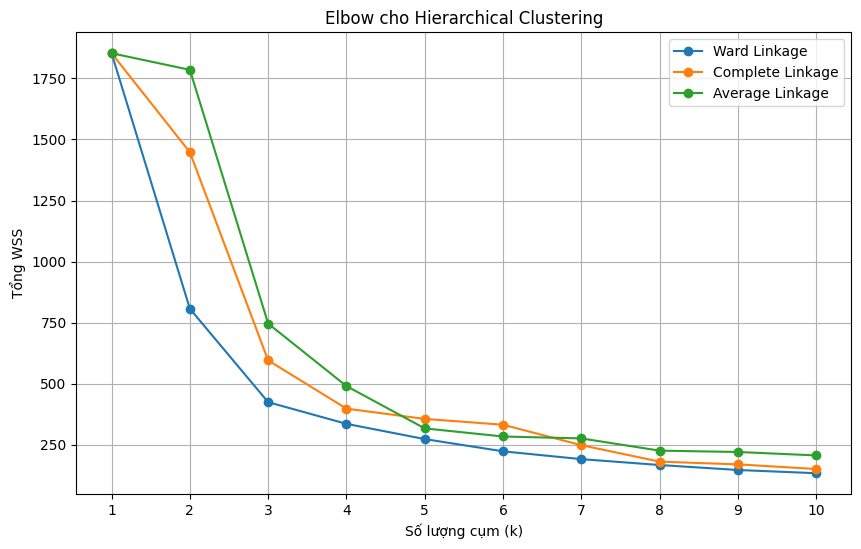

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

def calculate_wss(X, labels):
    wss = 0
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        wss += np.sum((cluster_points - centroid) ** 2)
    return wss

X = df[['PC1', 'PC2']].values
k_range = range(1, 11)
methods = ['ward', 'complete', 'average']

plt.figure(figsize=(10, 6))

for method in methods:
    linked = linkage(X, method=method)
    wss_values = []

    # Tính WSS k=1
    global_mean = np.mean(X, axis=0)
    wss_values.append(np.sum((X - global_mean)**2))

    # Tính WSS k từ 2 đến 10
    for k in range(2, 11):
        labels = fcluster(linked, k, criterion='maxclust')
        wss_values.append(calculate_wss(X, labels))

    plt.plot(k_range, wss_values, marker='o', label=f'{method.capitalize()} Linkage')

plt.title('Elbow cho Hierarchical Clustering')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Tổng WSS')
plt.legend()
plt.grid(True)
plt.xticks(k_range)
plt.show()

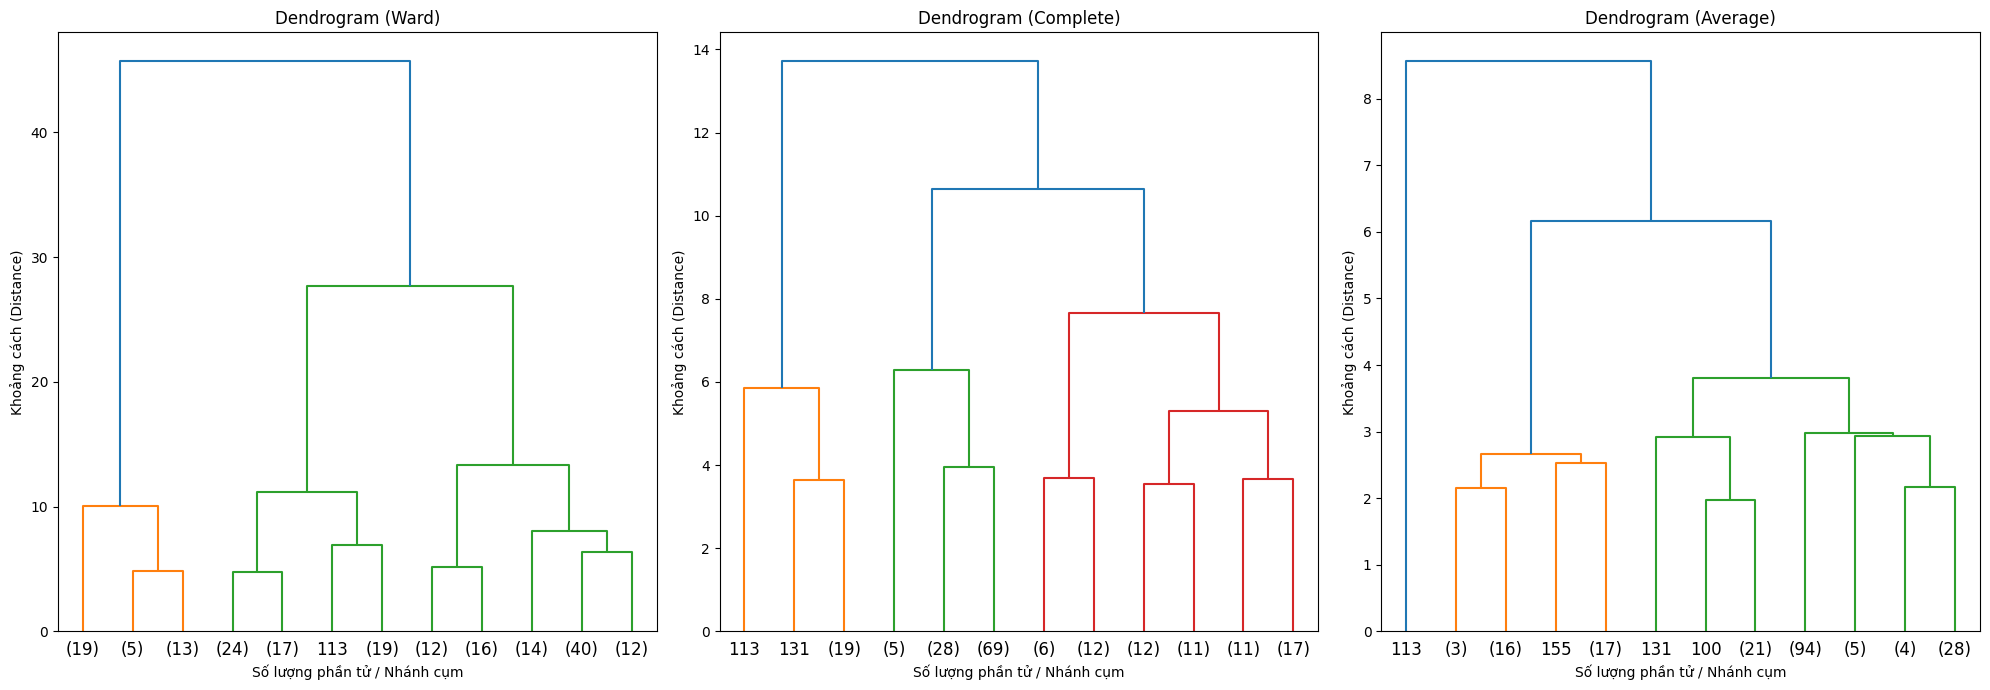

In [ ]:
from scipy.cluster.hierarchy import dendrogram

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
X_pca_2d = df[['PC1', 'PC2']]
methods = ['ward', 'complete', 'average']

for i, method in enumerate(methods):
    linked = linkage(X_pca_2d, method=method)
    dendrogram(linked, ax=axes[i], truncate_mode='lastp', p=12)
    axes[i].set_title(f'Dendrogram ({method.capitalize()})')
    axes[i].set_xlabel('Số lượng phần tử / Nhánh cụm')
    axes[i].set_ylabel('Khoảng cách (Distance)')

plt.tight_layout()
plt.show()

Từ Deogram 3 phương pháp phân cụm và phân tích số cụm là 3:
1.   Ward Linkage: Khoảng cách giữa các cụm được tính bằng mức độ gia tăng của tổng bình phương sai số khi gộp chúng lại
- Tại k=3: Đây là điểm mà Ward tạo ra cấu trúc cân bằng nhất. Các nhánh dọc dẫn đến 3 cụm này có chiều dài tương đối đồng đều
- Nhận xét: Ward cố gắng tối thiểu hóa phương sai nội bộ, tạo ra các nhóm quốc gia có quy mô thành viên tương đương nhau. Khác với hai cách kia thường tạo ra các cụm "lệch", Ward tại k=3 đảm bảo mỗi nhóm quốc gia đều có một "khối lượng" dữ liệu đủ lớn
2.   Complete Linkage: xác định khoảng cách giữa hai cụm bằng khoảng cách giữa hai điểm xa nhau nhất.
- Đặc điểm: Các nhánh cây thường có xu hướng cao hơn và nhọn hơn.
- Nhận xét: Complete Linkage tạo ra các cụm "chặt chẽ". Tuy nhiên, nó cực kỳ nhạy cảm với các quốc gia cá biệt.
3. Averrage Linkage:
- Averrage Linkage cho thấy khoảng trống dọc lớn nhất và rõ ràng nhất. Đường cắt tại k=3 đi qua những "thân cây" dài nhất, ranh giới giữa 3 cụm là cực kỳ vững chắc.
- Điều này chứng tỏ về mặt toán học, Average tạo ra các cụm có ranh giới rõ ràng nhất và ít bị chồng lấn nhất.


# Ward linkage

--- Kết quả đánh giá cho Ward Linkage (k=3) ---
Silhouette Score: 0.4669
Davies-Bouldin Score: 0.7025
Calinski-Harabasz Score: 318.0648


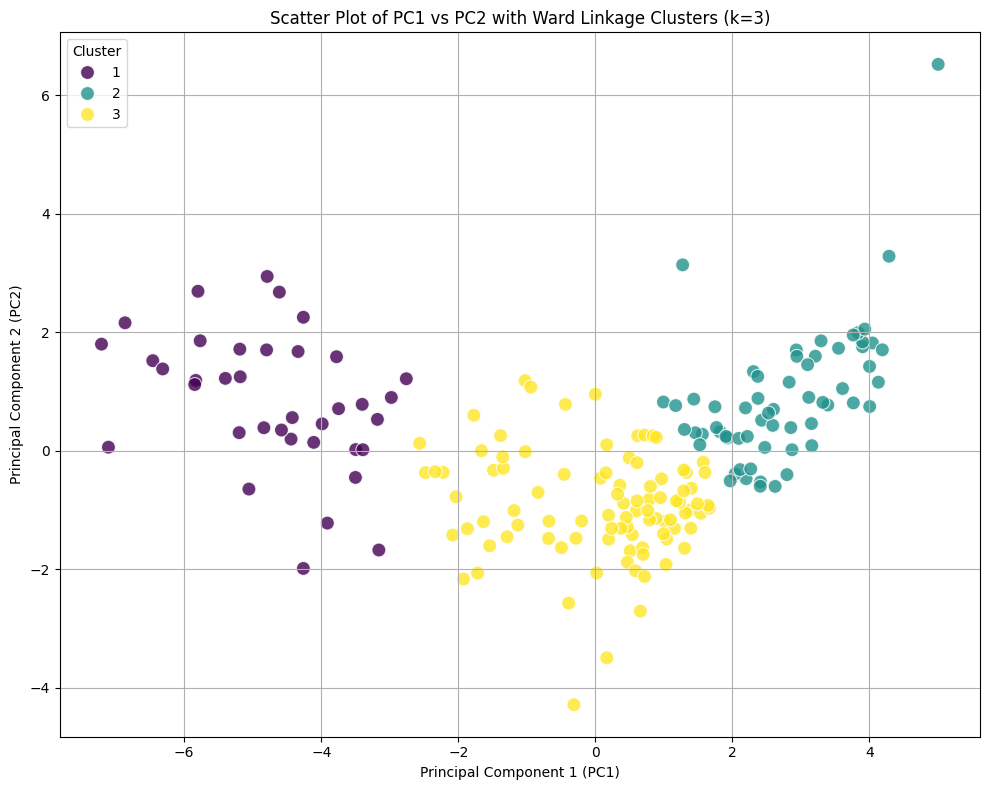

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster

X_pca_2d = df[['PC1', 'PC2']]
num_clusters = 3
linked_ward = linkage(X_pca_2d, method='ward')
clusters = fcluster(linked_ward, num_clusters, criterion='maxclust')

df['Cluster_PC1_PC2_Ward'] = clusters

sil_score = silhouette_score(X_pca_2d, clusters)
db_score = davies_bouldin_score(X_pca_2d, clusters)
ch_score = calinski_harabasz_score(X_pca_2d, clusters)

print(f"--- Kết quả đánh giá cho Ward Linkage (k={num_clusters}) ---")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster_PC1_PC2_Ward',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)

plt.title('Scatter Plot of PC1 vs PC2 with Ward Linkage Clusters (k=3)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()

plt.show()

# Complete linkage

Silhouette Score: 0.4209 
Davies-Bouldin Score: 0.6890
Calinski-Harabasz Score: 199.5398


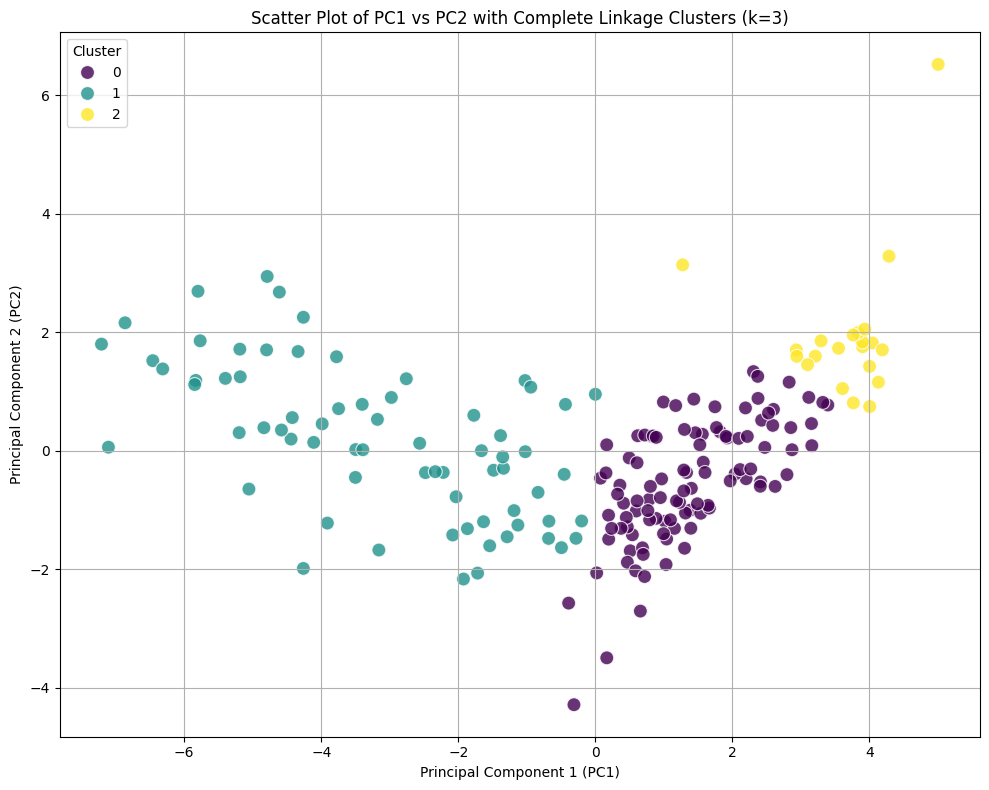

In [ ]:
# 1. Thực hiện phân cụm complete với k=3
X_pca_2d = df[['PC1', 'PC2']]
num_clusters = 3
linked_complete = linkage(X_pca_2d, method='complete')
clusters = fcluster(linked_complete, num_clusters, criterion='maxclust')
clusters = clusters - 1

df['Cluster_PC1_PC2_Complete'] = clusters
mapping = {2: 1, 1: 0, 0: 2}
df['Cluster_PC1_PC2_Complete'] = df['Cluster_PC1_PC2_Complete'].map(mapping)

# ---------------------

sil_score = silhouette_score(X_pca_2d, clusters)
db_score = davies_bouldin_score(X_pca_2d, clusters)
ch_score = calinski_harabasz_score(X_pca_2d, clusters)

print(f"Silhouette Score: {sil_score:.4f} ")
print(f"Davies-Bouldin Score: {db_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster_PC1_PC2_Complete',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)

plt.title('Scatter Plot of PC1 vs PC2 with Complete Linkage Clusters (k=3)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Average linkage

--- Kết quả đánh giá cho Average Linkage (k=3) ---
Silhouette Score: 0.5355
Davies-Bouldin Score: 0.4436
Calinski-Harabasz Score: 140.1665


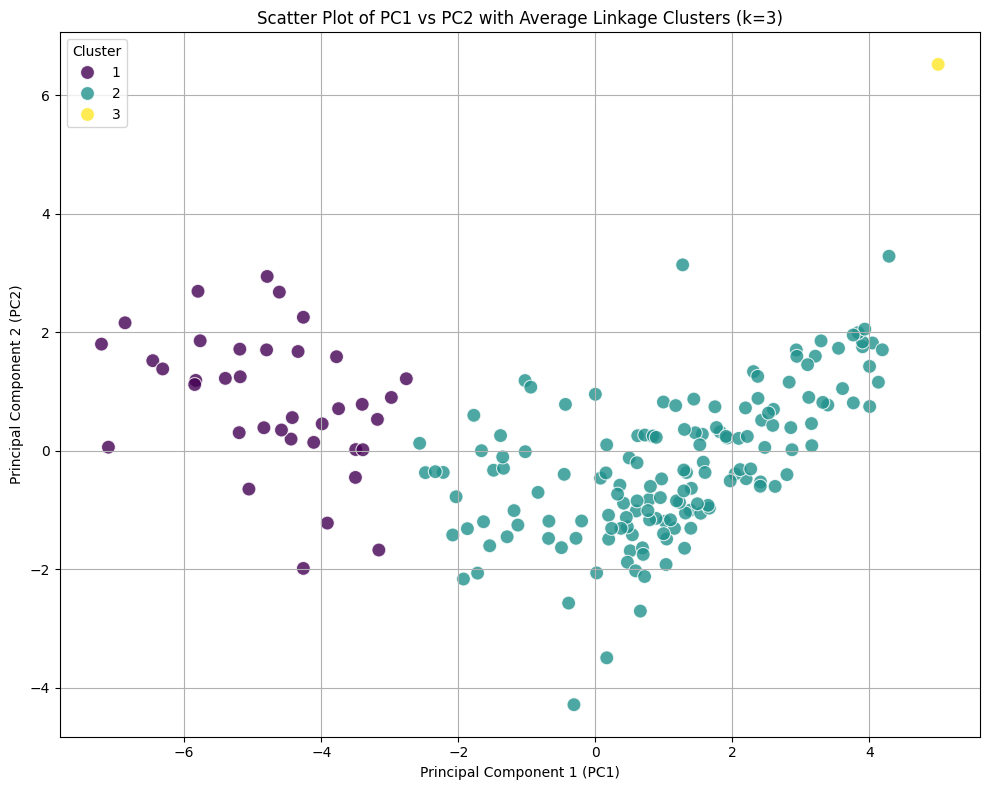

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster

X_pca_2d = df[['PC1', 'PC2']]
num_clusters = 3
linked_average = linkage(X_pca_2d, method='average')
clusters = fcluster(linked_average, num_clusters, criterion='maxclust')

df['Cluster_PC1_PC2_Average'] = clusters

sil_score = silhouette_score(X_pca_2d, clusters)
db_score = davies_bouldin_score(X_pca_2d, clusters)
ch_score = calinski_harabasz_score(X_pca_2d, clusters)

print(f"--- Kết quả đánh giá cho Average Linkage (k={num_clusters}) ---")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster_PC1_PC2_Average',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)

plt.title('Scatter Plot of PC1 vs PC2 with Average Linkage Clusters (k=3)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()

plt.show()

In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/IE313/DoAn/Data/wdi_pca_3.csv")
df_ward_export = df_original.copy()
df_ward_export['Cluster'] = df['Cluster_PC1_PC2_Ward']

output_path_ward = '/content/drive/MyDrive/IE313/DoAn/Data/Hierarchical/wdi_pca_3_ward_clusters.csv'
df_ward_export.to_csv(output_path_ward, index=False)

print(f"Original data with 'Cluster_Ward' (1-3) saved to {output_path_ward}")

Original data with 'Cluster_Ward' (1-3) saved to /content/drive/MyDrive/IE313/DoAn/Data/Hierarchical/wdi_pca_3_ward_clusters.csv


In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/IE313/DoAn/Data/wdi_pca_3.csv")
df_complete_export = df_original.copy()
df_complete_export['Cluster'] = df['Cluster_PC1_PC2_Complete']

output_path_complete = '/content/drive/MyDrive/IE313/DoAn/Data/hierarchical_result.csv'
df_complete_export.to_csv(output_path_complete, index=False)

print(f"Original data with 'Cluster_Complete' (1-3) saved to {output_path_complete}")

Original data with 'Cluster_Complete' (1-3) saved to /content/drive/MyDrive/IE313/DoAn/Data/hierarchical_result.csv


In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/IE313/DoAn/Data/wdi_pca_3.csv")
df_average_export = df_original.copy()
df_average_export['Cluster'] = df['Cluster_PC1_PC2_Average']

output_path_average = '/content/drive/MyDrive/IE313/DoAn/Data/Hierarchical/wdi_pca_3_average_clusters.csv'
df_average_export.to_csv(output_path_average, index=False)

print(f"Original data with 'Cluster_Average' (1-3) saved to {output_path_average}")

Original data with 'Cluster_Average' (1-3) saved to /content/drive/MyDrive/IE313/DoAn/Data/Hierarchical/wdi_pca_3_average_clusters.csv
